<a href="https://colab.research.google.com/github/nikshargithub/ML_PROJECTS/blob/main/2024_01_06_NIKHIL_SHARMA_PROJECT_71.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 16: House Price Prediction

---

### Context

The price of the house depends on various factors like locality, connectivity, number of rooms, etc. Change in the mindset of the millennial generation also contributes to ups and down in house prices as the young generation is much into renting than to owe a house. Predicting the right price of the house is important for investors in the real estate business. This makes it very important to come up with proper and smart technique to estimate the true price of the house.


---

#### Getting Started



1. Follow the next three steps to create your project.

2. Create the duplicate copy of the Colab file. Here are the steps to create the duplicate copy:

    - Click on the **File** menu. A new drop-down list will appear.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/0_file_menu.png' width=500>

    - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/1_create_colab_duplicate_copy.png' width=500>

     - After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_CapstoneProject17** format.

3. Now, write your code in the prescribed code cells.

---

### Problem Statement


You are willing to sell your house. You are not sure about the price of your house and want to estimate its price. You are provided with the dataset and need to make a prediction model which will help you to get a good estimate of your house for selling it.

---

### Data Description

The **housing** dataset contains the prices and other attributes. There are $545$ rows and $12$ attributes (features) with a target column (price).

Following are the features:  

|Column|Description|
|---:|:---|
|`Price`|Price in INR|
|`area`|Area in square ft.|
|`bedrooms`|Number of bedrooms in the house|
|`bathrooms`|Number of bathrooms in the house|
|`stories`|Number of stores in the house|
|`mainroad`|Whether house is on main road or not(binary)|
|`guestroom`|Whether house have guestroom or not(binary)|
|`basement`|Whether house have basement or not(binary)|
|`airconditioning`|Whether house have airconditioning or not(binary)|
|`hotwaterheating`|Whether house have hotwaterheating or not(binary)|
|`parking`|Number of parking area|
|`prefarea`|Whether house have prefarea or not(binary)|
|`furnishingstatus`|Furnish status of the house|


  **Dataset Link:**  https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv


---

### Things To Do

1. Explore the Housing dataset by creating the following plots:
   - Box plots between each categorical feature and the `price`.
   - Scatter plots between the numerical features and the `price`.
   
2. Convert categorical attributes into numerical attributes using feature encoding.

3. Build a linear regression model by selecting the most relevant features to predict the price of houses.

4. Evaluate the linear regression model by calculating the parameters such as coefficient of determination, MAE, MSE, RMSE, mean of residuals and by checking for homoscedasticity.



---

#### 1. Import Modules and Load Dataset

**Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv








In [ ]:
# Import the required modules and load the dataset.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Check if there are any NULL values.
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

---

#### 2. Exploratory Data Analysis

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables.

Perform the following tasks:

- Create Box plots between each **categorical** variable and the target variable `price` to sense the distribution of values.

- Create the Scatter plots between each **numerical** variable and the target variable `price`. Determine which variable(s) shows linear relationship with the target variable `price`.

- Create a normal distribution curve for the `price`.


In [ ]:
# Check categorical attributes
House_categorical_df = df.select_dtypes(include = 'object')
House_categorical_df

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


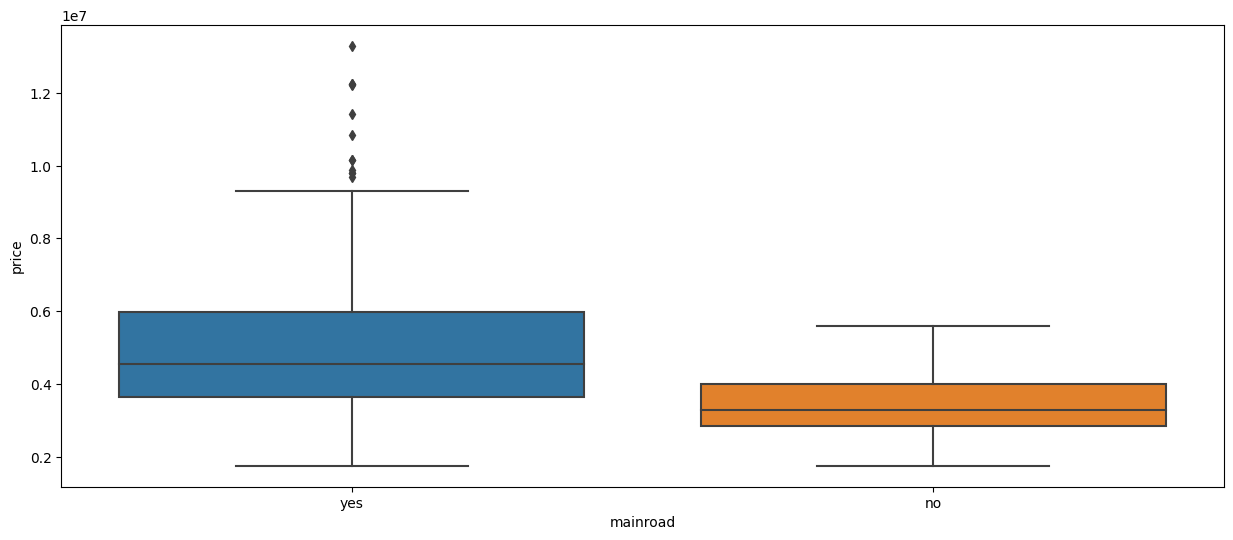

In [ ]:
# Boxplot for 'mainroad' vs 'price'
plt.figure(figsize = (15,6))
sns.boxplot(df,x = 'mainroad',y = 'price')
plt.show()

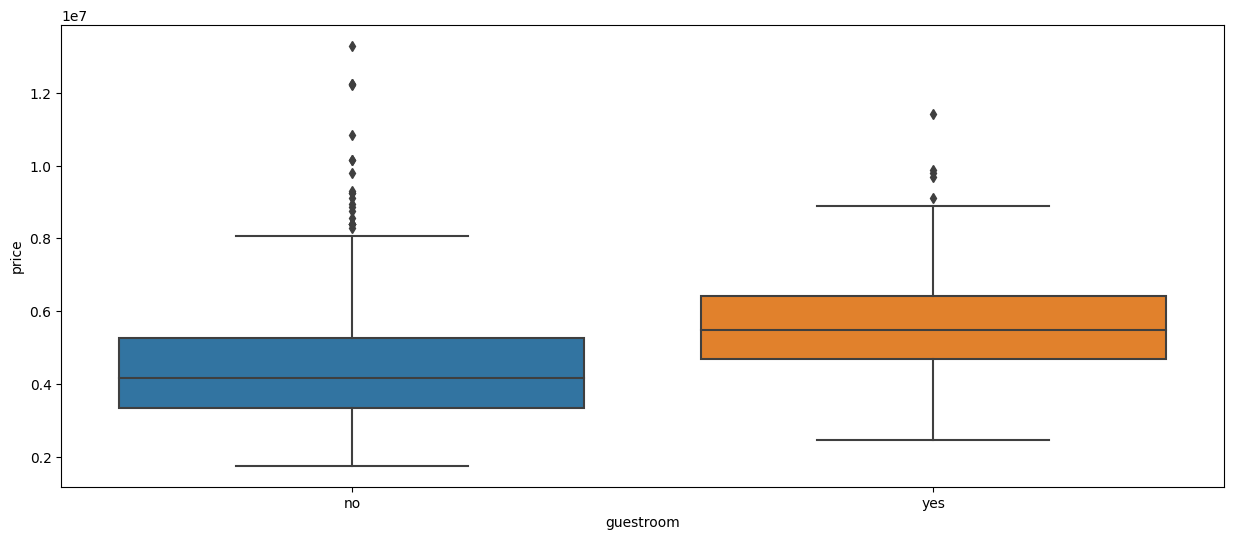

In [ ]:
# Boxplot for 'guestroom' vs 'price'
plt.figure(figsize = (15,6))
sns.boxplot(df,x = 'guestroom',y = 'price')
plt.show()

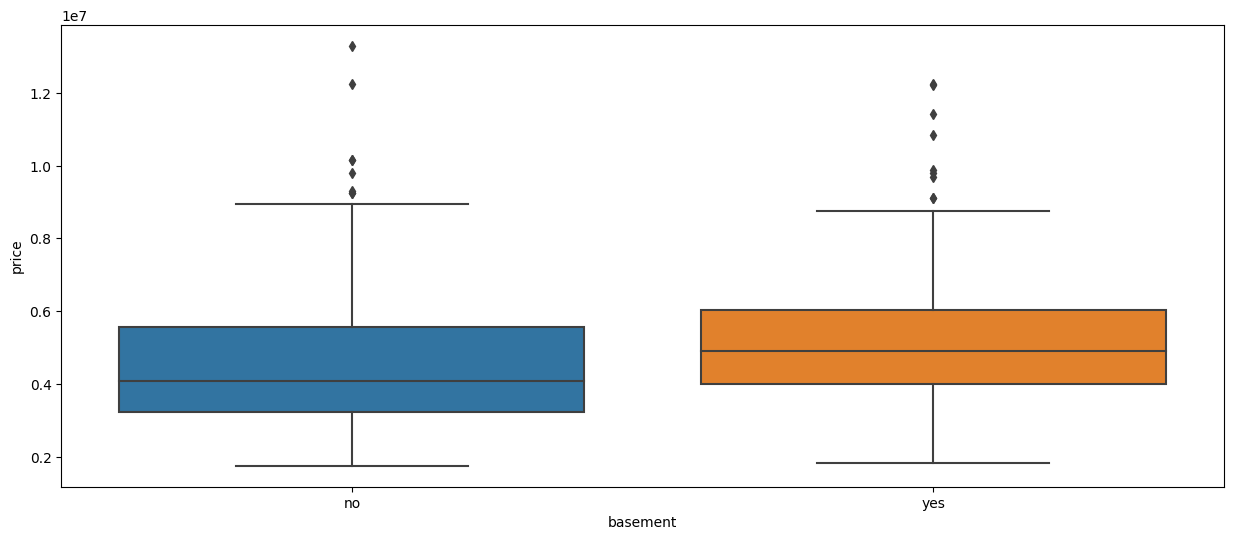

In [ ]:
# Boxplot for 'basement' vs 'price'
plt.figure(figsize = (15,6))
sns.boxplot(df,x = 'basement',y = 'price')
plt.show()

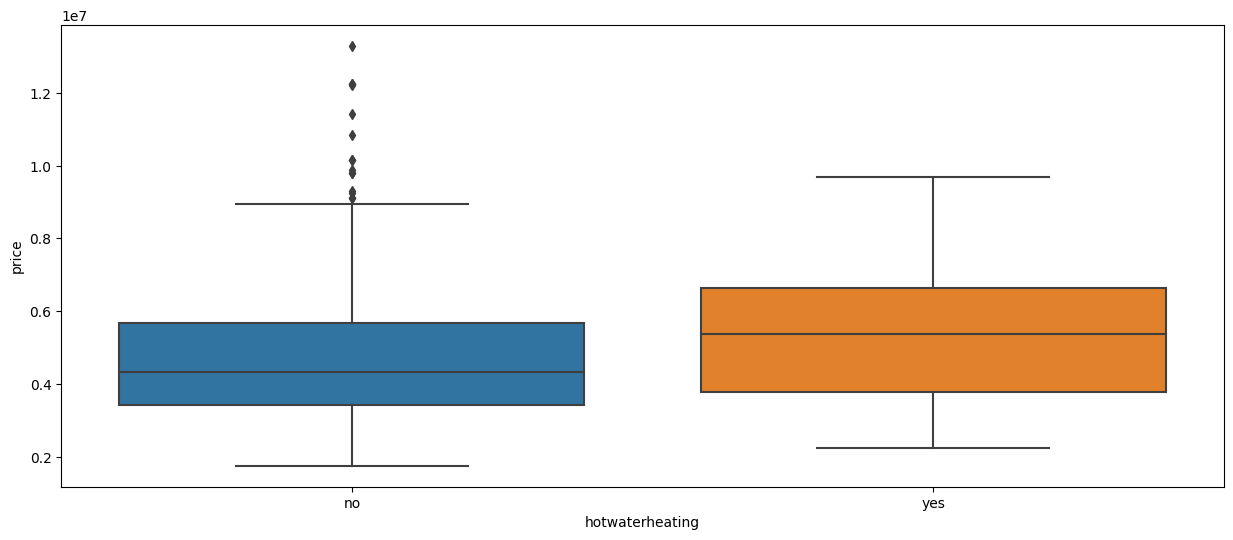

In [ ]:
# Boxplot for 'hotwaterheating' vs 'price'
plt.figure(figsize = (15,6))
sns.boxplot(df,x = 'hotwaterheating',y = 'price')
plt.show()

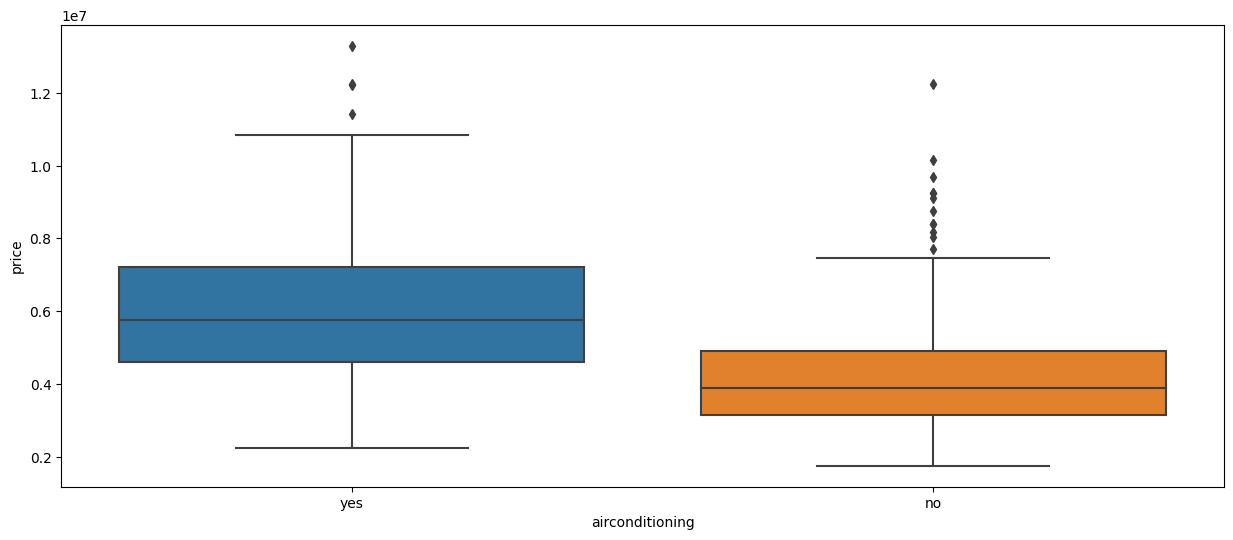

In [ ]:
# Boxplot for 'airconditioning' vs 'price'
plt.figure(figsize = (15,6))
sns.boxplot(df,x = 'airconditioning',y = 'price')
plt.show()

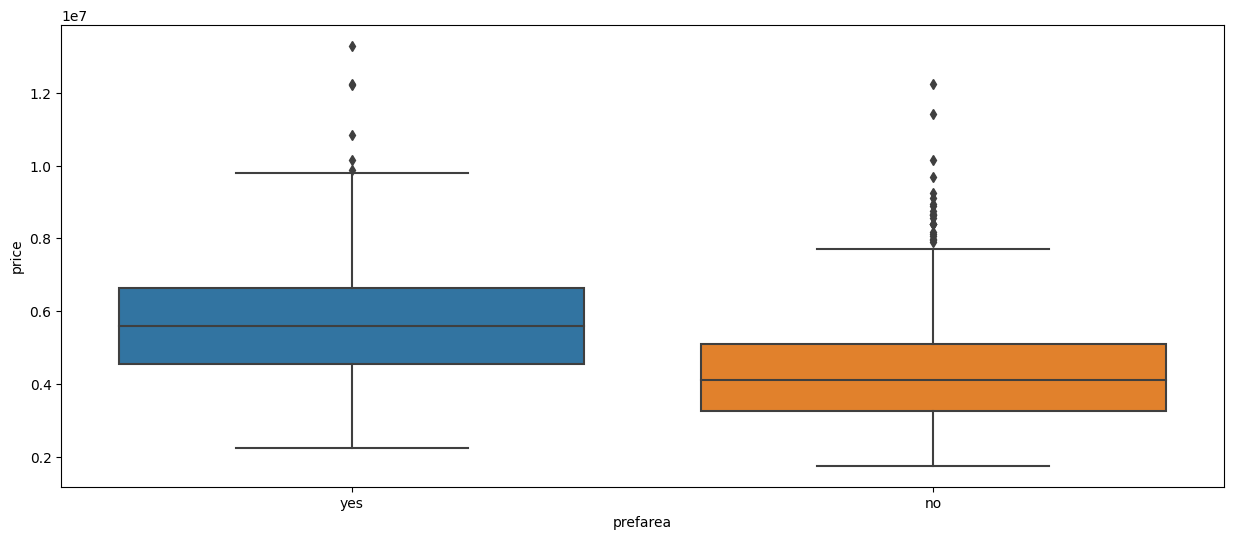

In [ ]:
# Boxplot for 'prefarea' vs 'price'
plt.figure(figsize = (15,6))
sns.boxplot(df,x = 'prefarea',y = 'price')
plt.show()

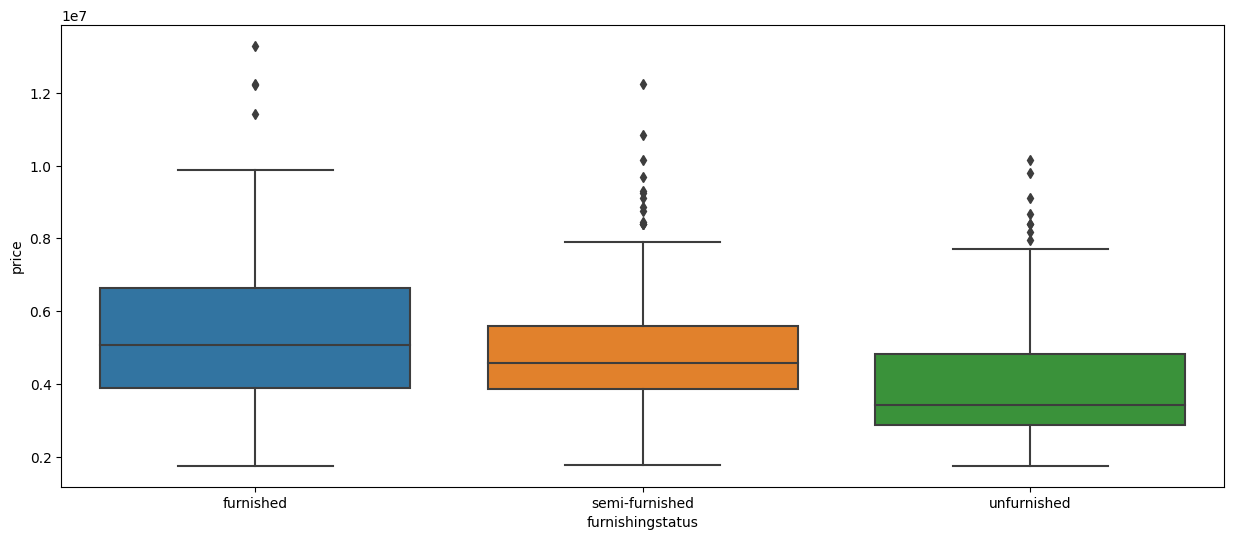

In [ ]:
# Boxplot for 'furnishingstatus' vs 'price'
plt.figure(figsize = (15,6))
sns.boxplot(df,x = 'furnishingstatus',y = 'price')
plt.show()

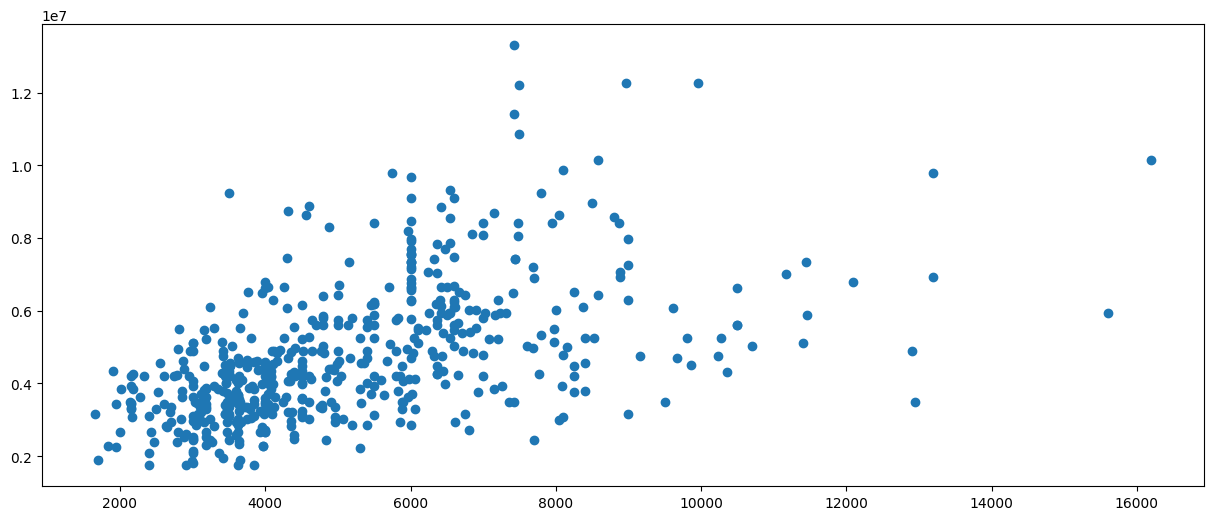

In [ ]:
# Create scatter plot with 'area' on X-axis and 'price' on Y-axis
plt.figure(figsize = (15,6))
plt.scatter(df['area'],df['price'])
plt.show()

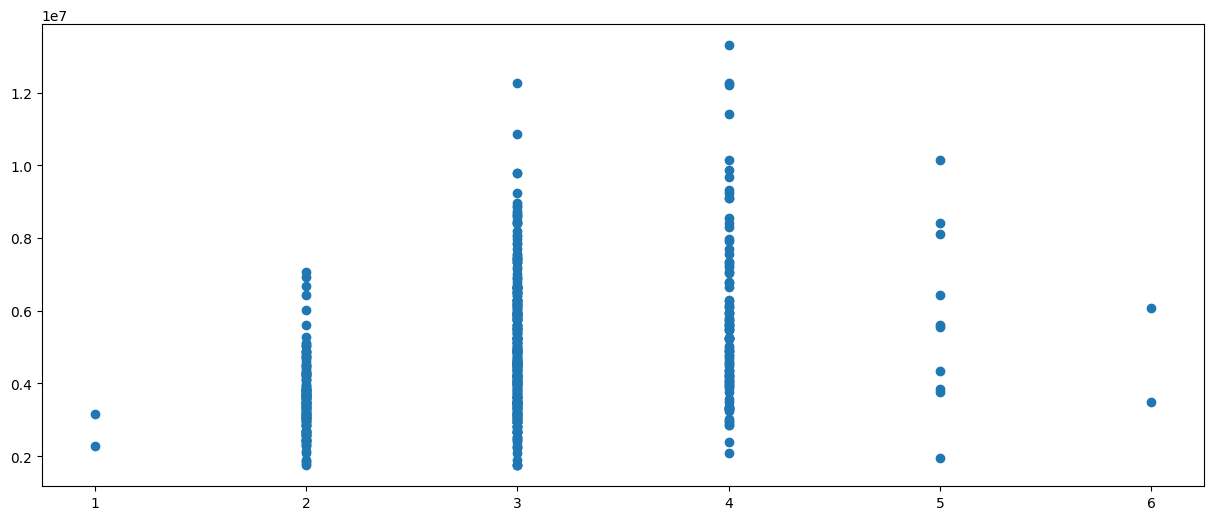

In [ ]:
# Create scatter plot with 'bedrooms' on X-axis and 'price' on Y-axis
plt.figure(figsize = (15,6))
plt.scatter(df['bedrooms'],df['price'])
plt.show()

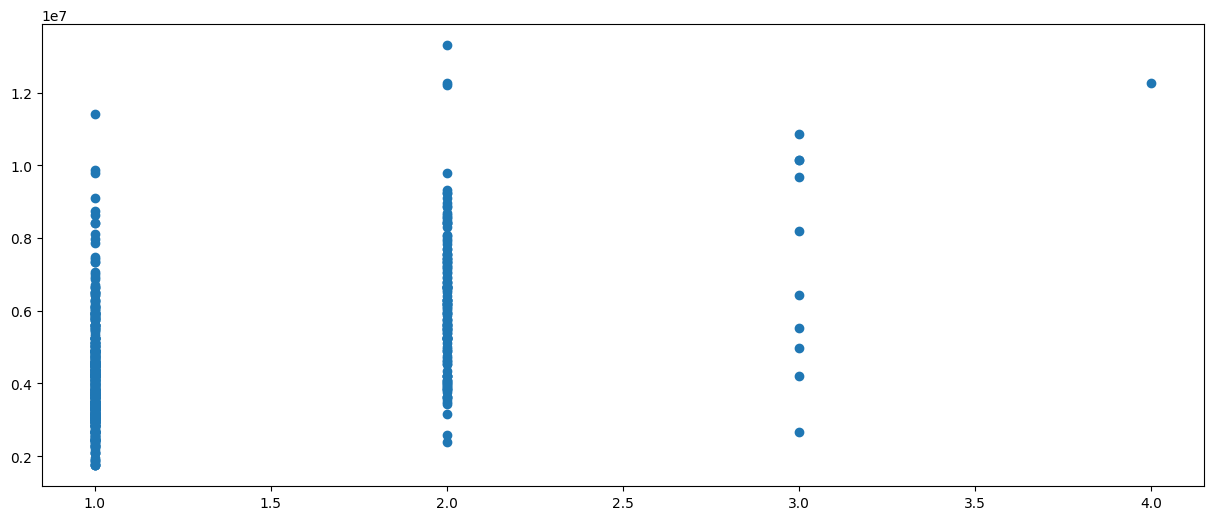

In [ ]:
# Create scatter plot with 'bathrooms' on X-axis and 'price' on Y-axis
plt.figure(figsize = (15,6))
plt.scatter(df['bathrooms'],df['price'])
plt.show()

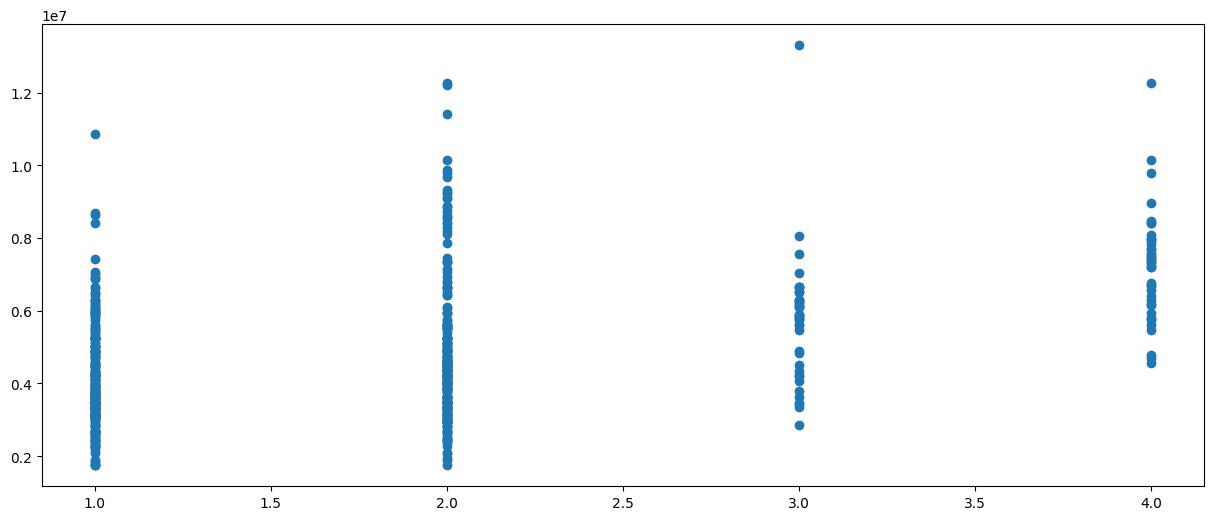

In [ ]:
# Create scatter plot with 'stories' on X-axis and 'price' on Y-axis
plt.figure(figsize = (15,6))
plt.scatter(df['stories'],df['price'])
plt.show()

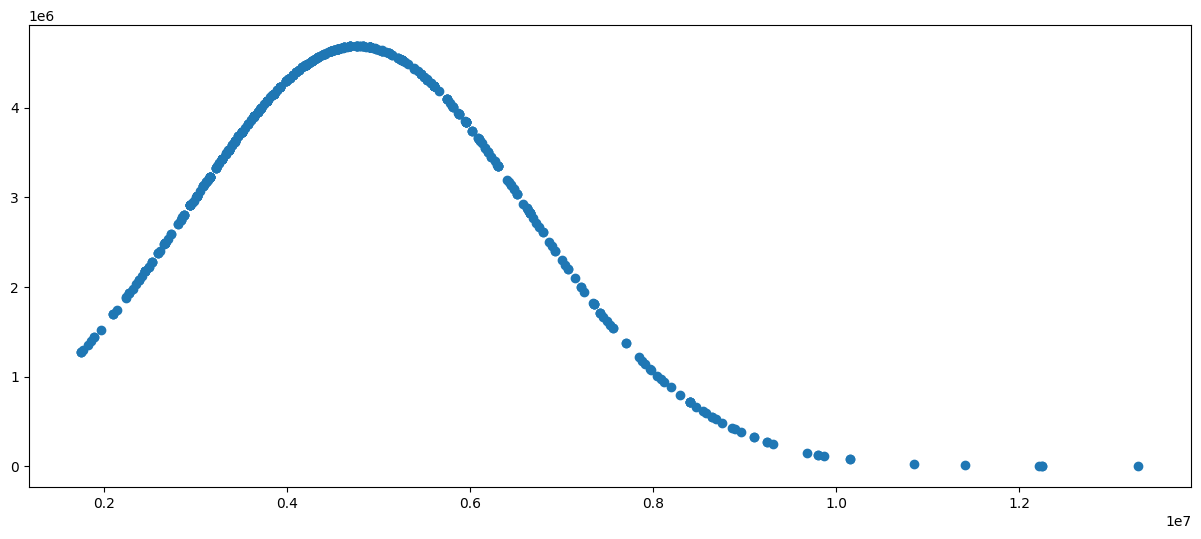

In [ ]:
# Create a normal distribution curve for the 'price'.
from scipy.stats import norm
# Create a probablity density function for plotting the normal distribution
def prob_density_func(ser):
  sigma = ser.std()
  mu = ser.mean()
  den = 1/(sigma*((2*np.pi)**0.5))
  num1 = (-((ser-mu)**2))/(2*sigma*sigma)
  num = np.e**(num1)
  pdf = num/den
  return pdf
# Plot the normal distribution curve using plt.scatter()
plt.figure(figsize = (15,6))
plt.scatter(df['price'],prob_density_func(df['price']))
plt.show()

---

#### 3. Feature encoding

Perform feature encoding using `map()` function and one-hot encoding.

In [ ]:
# Replace yes with 1 and no with 0 for all the values in features 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' using map() function.
words_dict = {'yes':1,'no':0}
def replace_num(ser):
  return ser.map(words_dict)
l = list(House_categorical_df.columns)
l.remove('furnishingstatus')
pd.Series(l)
df[l] = df[l].apply(replace_num, axis=1)

In [ ]:
# Print dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Perform one hot encoding for furnishingstatus feature.
furnishingstatus_dummy = pd.get_dummies(df['furnishingstatus'], drop_first = True, dtype = int)
df = pd.concat([df, furnishingstatus_dummy], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [ ]:
# Drop 'furnishingstatus' feature
df.drop('furnishingstatus',axis = 1, inplace = True)

In [ ]:
# Print dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


---

#### 4. Model Building and Evaluation

Build a multiple linear regression model using the `statsmodels.api` module.

In [ ]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(df, test_size = 0.3, random_state = 42)

In [ ]:
# Create separate data-frames for the feature and target variables for both the train and test sets.
features = list(df.columns)
features.remove('price')
X_train = train_df[features]
y_train = train_df['price']
X_test = test_df[features]
y_test = test_df['price']

In [ ]:
# Build a linear regression model using all the features to predict prices.
import statsmodels.api as sm
c = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, c).fit()
lin_reg.params

const              9.578423e+04
area               2.532873e+02
bedrooms           8.089314e+04
bathrooms          1.114751e+06
stories            4.172676e+05
mainroad           4.080737e+05
guestroom          2.757105e+05
basement           4.826035e+05
hotwaterheating    6.163754e+05
airconditioning    6.858393e+05
parking            3.031112e+05
prefarea           5.091921e+05
semi-furnished    -1.216527e+05
unfurnished       -3.911912e+05
dtype: float64

In [ ]:
# Print the summary of the linear regression report.
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.79
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           1.00e-85
Time:                        18:49:37   Log-Likelihood:                -5797.3
No. Observations:                 381   AIC:                         1.162e+04
Df Residuals:                     367   BIC:                         1.168e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9.578e+04   2.97e+05     

In [ ]:
# Calculate N and p values
print("No. of observations N = ",X_train.shape[0])
print('P value can be seen from the summary() of LinearRegression Class')
print(lin_reg.summary())

No. of observations N =  381
P value can be seen from the summary() of LinearRegression Class
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.79
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           1.00e-85
Time:                        18:49:37   Log-Likelihood:                -5797.3
No. Observations:                 381   AIC:                         1.162e+04
Df Residuals:                     367   BIC:                         1.168e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [ ]:
# Calculate the adjusted R-square value.
adj_r2_score = 1 - (1 - 0.693) * (X_train.shape[0] - 1)/(X_train.shape[0] - X_train.shape[1] - 1)
print(f"adjusted R-SQUARED value:{adj_r2_score:.3f}")

adjusted R-SQUARED value:0.682


**Q:** What is the Adjusted $R^2$ value?

**A:**0.682


---

#### 5. Model Evaluation

Build a multiple linear regression model  using `sklearn` module. Also, evaluate the model by calculating $R^2$, MSE, RMSE, and MAE values.

In [ ]:
# Build multiple linear regression model using all the featuresfr
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
y_train_pred = lin_reg2.predict(X_train)
y_test_pred = lin_reg2.predict(X_test)
print('Train Set')
print('---------------------------')
print(f"R-squared = {r2_score(y_train, y_train_pred):.3f}")
print(f"Mean absolute error = {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"Mean squared error = {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root mean squared error = {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print('Test Set')
print('----------------------------')
print(f"R-squared = {r2_score(y_test, y_test_pred):.3f}")
print(f"Mean absolute error = {mean_absolute_error(y_test, y_test_pred):.3f}")
print(f"Mean squared error = {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root mean squared error = {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")

Train Set
---------------------------
R-squared = 0.693
Mean absolute error = 720245.199
Mean squared error = 963835379828.360
Root mean squared error = 981751.180
Test Set
----------------------------
R-squared = 0.646
Mean absolute error = 920392.940
Mean squared error = 1523019469501.291
Root mean squared error = 1234106.750


**Q:** What is the $R^2$ value for train set and test set?

**A:**
      Train Set: 0.693,
      Test Set: 0.646

---

#### 6. Recursive Feature Elimination

Find out the best features out of all features using RFE and evaluate the model again.

In [ ]:
# Create a Python dictionary storing the moderately to highly correlated features with price and the corresponding correlation values.
# Keep correlation threshold to be 0.2
major_features = {}
for f in features:
  corr_coef = np.corrcoef(df['price'], df[f])[0, 1]
  if (corr_coef >= 0.2) or (corr_coef <= -0.2):
    major_features[f] = corr_coef
print(major_features.keys())

dict_keys(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'airconditioning', 'parking', 'prefarea', 'unfurnished'])


In [ ]:
# Perform RFE and select best 7 features
from sklearn.feature_selection import RFE
lin_reg3 = LinearRegression()
rfe = RFE(lin_reg3, n_features_to_select=7)
rfe.fit(X_train[major_features.keys()], y_train)
print(major_features.keys())
print(rfe.support_)
print(rfe.ranking_)

dict_keys(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'airconditioning', 'parking', 'prefarea', 'unfurnished'])
[False False  True False  True  True  True  True  True  True]
[4 3 1 2 1 1 1 1 1 1]


In [ ]:
# Print the 7 features selected by RFE in the previous step.
rfe_features = X_train[major_features.keys()].columns[rfe.support_]
print(rfe_features)

Index(['bathrooms', 'mainroad', 'guestroom', 'airconditioning', 'parking',
       'prefarea', 'unfurnished'],
      dtype='object')


In [ ]:
# Build multiple linear regression model using all the features selected after RFE

# Split the DataFrame into the train and test sets such that test set has 33% of the values.
train_df,test_df = train_test_split(df,test_size = 0.33, random_state = 42)
X_train_rfe = train_df[rfe_features]
y_train_rfe = train_df['price']
X_test_rfe = test_df[rfe_features]
y_test_rfe = test_df['price']
# Build linear regression model using the 'sklearn.linear_model' module.
lr_model = LinearRegression()
lr_model.fit(X_train_rfe,y_train_rfe)
# Print the value of the intercept
print(lr_model.intercept_)
# Print the names of the features along with the values of their corresponding coefficients.
features2 = list(rfe_features)
for i in range(len(features2)):
  print(f'{features2[i]}:{lr_model.coef_[i]}')

1345359.6611008313
bathrooms:1556331.097030728
mainroad:770395.8008647286
guestroom:661976.529100477
airconditioning:1025562.0771522534
parking:428129.11332020164
prefarea:698073.8926570925
unfurnished:-424295.92317738186


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
y_train_pred = lr_model.predict(X_train_rfe)
y_test_pred = lr_model.predict(X_test_rfe)
print('Train Set')
print('---------------------------')
print(f"R-squared = {r2_score(y_train_rfe, y_train_pred):.3f}")
print(f"Mean absolute error = {mean_absolute_error(y_train_rfe, y_train_pred):.3f}")
print(f"Mean squared error = {mean_squared_error(y_train_rfe, y_train_pred):.3f}")
print(f"Root mean squared error = {np.sqrt(mean_squared_error(y_train_rfe, y_train_pred)):.3f}")
print('Test Set')
print('----------------------------')
print(f"R-squared = {r2_score(y_test_rfe, y_test_pred):.3f}")
print(f"Mean absolute error = {mean_absolute_error(y_test_rfe, y_test_pred):.3f}")
print(f"Mean squared error = {mean_squared_error(y_test_rfe, y_test_pred):.3f}")
print(f"Root mean squared error = {np.sqrt(mean_squared_error(y_test_rfe, y_test_pred)):.3f}")

Train Set
---------------------------
R-squared = 0.582
Mean absolute error = 832458.404
Mean squared error = 1293627387054.370
Root mean squared error = 1137377.416
Test Set
----------------------------
R-squared = 0.546
Mean absolute error = 1028596.997
Mean squared error = 1945845160950.812
Root mean squared error = 1394935.540


---

#### 7. Residual (Error) Analysis

Perform residual analysis to check if the residuals (errors) are normally distributed or not. For this, plot the  histogram of the residuals.

Mean of residuals = 0.000



<ipython-input-555-1bde0e2dffb8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_residuals, bins = 'sturges',label = f"Mean of residuals = {np.mean(train_residuals):.3f}\n",kde = False)


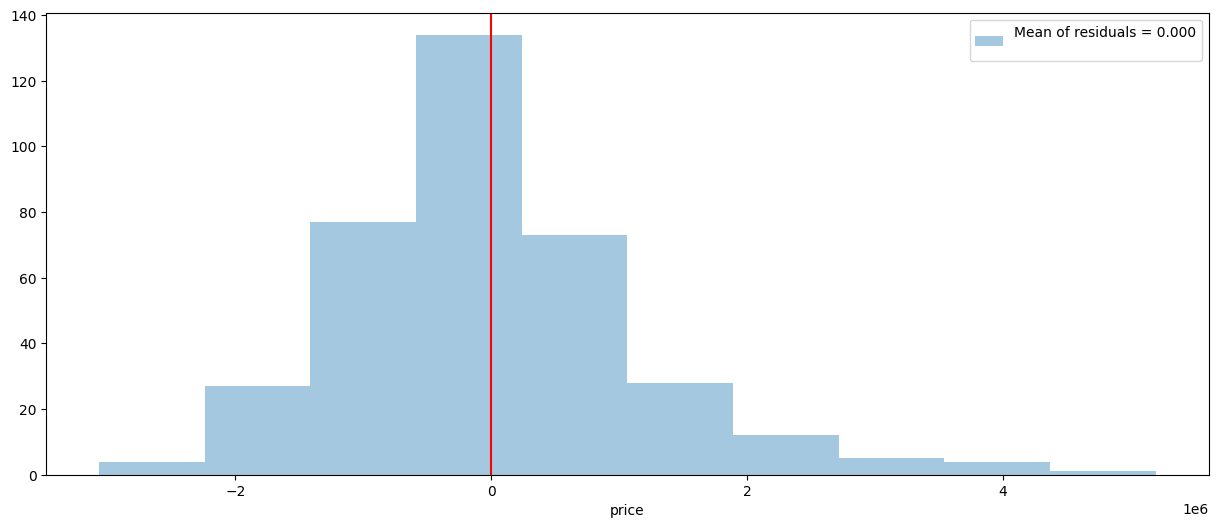

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the train set.
train_residuals = y_train_rfe - y_train_pred
print(f"Mean of residuals = {np.mean(train_residuals):.3f}\n")

plt.figure(figsize = (15,6))
sns.distplot(train_residuals, bins = 'sturges',label = f"Mean of residuals = {np.mean(train_residuals):.3f}\n",kde = False)
plt.axvline(np.mean(train_residuals),color = 'red')
plt.legend()
plt.show()

Mean of residuals = -17538.325



<ipython-input-556-f4916f7b99af>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_residuals, bins = 'sturges',label = f"Mean of residuals = {np.mean(test_residuals):.3f}\n",kde = False)


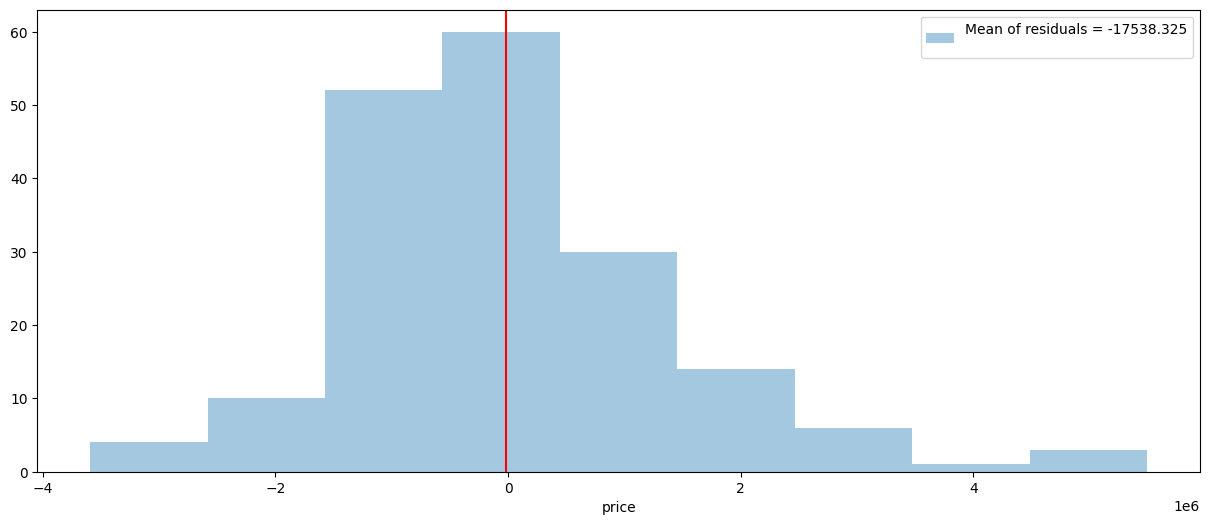

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the test set.
# Create a histogram for the errors obtained in the predicted values for the train set.
test_residuals = y_test_rfe - y_test_pred
print(f"Mean of residuals = {np.mean(test_residuals):.3f}\n")

plt.figure(figsize = (15,6))
sns.distplot(test_residuals, bins = 'sturges',label = f"Mean of residuals = {np.mean(test_residuals):.3f}\n",kde = False)
plt.axvline(np.mean(test_residuals),color = 'red')
plt.legend()
plt.show()

---

#### 8. Verify Homoscedasticity

Check for Homoscedasticity (constant variance) by creating a scatter plot between the errors and the target variable. Determine whether there is some kind of relationship between the error and the target variable.

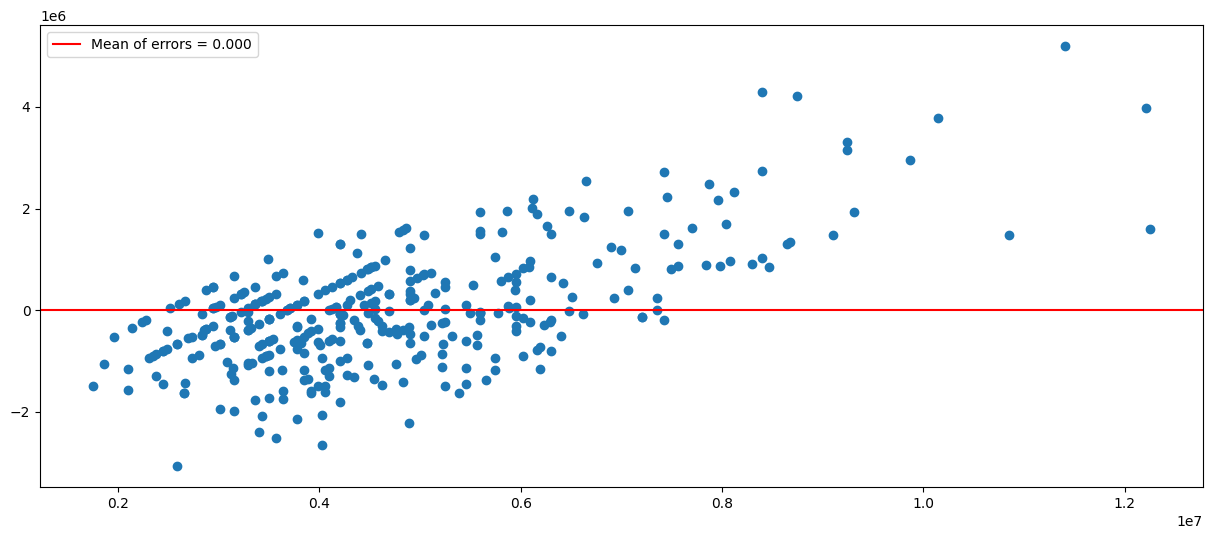

In [ ]:
# Create a scatter plot between the errors and the dependent variable for the train set.
plt.figure(figsize = (15,6))
plt.scatter(y_train_rfe, train_residuals)
plt.axhline(y = train_residuals.mean(), color = 'r', label = f'Mean of errors = {train_residuals.mean():.3f}')
plt.legend()
plt.show()

---

### Submitting the Project

Follow the steps described below to submit the project.

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>


3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_CapstoneProject17**) of the notebook will get copied

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_CapstoneProject17** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>


---